# What's the terminal velocity of a skydiver?

## Names of group members

// put your names here!

## Goals of this assignment

The main goal of this assignment is to use numerical integration and differentiation to study the behavior of a skydiver.  You're going to use the numerical integration and differentiation techniques that you learned in the pre-class assignment.

## Some background knowledge that we need for this model

### Position, velocity, and acceleration 

In physics, three important properties of a moving object are its position ($\vec{x}$), velocity ($\vec{v}$), and acceleration ($\vec{a}$).  These are *vector quantities*, meaning that they have both a magnitude and a direction, and are related in the following way:

$\vec{v} = \frac{d\vec{x}}{dt}$ 

$\vec{a} = \frac{d\vec{v}}{dt}$ - i.e., acceleration is the rate of change of velocity (units of meters per second$^2$)

In words, velocity is the rate of change of position with time (and having units of length per time) and acceleration is the rate of change of velocity with time (and having units of length per time$^2$).  Given this, the fundamental theorem of calculus tells us that we can relate these quantities by integration as well.  Expressed mathematically:

$\vec{x} = \vec{x}_0 + \int_0^t \vec{v}(t) dt$

$\vec{v} = \vec{v}_0 + \int_0^t \vec{a}(t) dt$

So, we can get the position at any time by starting at the initial position and integrating the velocity over time, and can get the velocity at any time by starting with the initial velocity and integrating the acceleration over time.

### Terminal velocity

An object moving through a fluid like air or water experiences a force of friction - just think about what happens if you stick your hand out of the window of a moving car!  This is why airplanes need to run their engines constantly while in flight; when traveling at a constant speed, the force exerted by the engines just balances the force exerted by the air friction.  This force of friction always points in the *opposite direction* of the object's motion (in other words, in the opposite direction of its velocity).

A similar thing happens to a falling object.  As an object falls downward faster and faster, the force of gravity pulling downward is eventually perfectly balanced by the upward force from air resistance (upward because the direction of motion is down).  When these forces perfectly balance, the object experiences zero acceleration, and thus its velocity becomes constant.  We call this the **terminal velocity**.



## The challenge

Your professor happens to mention that he went skydiving last weekend.  He jumped from a stationary helicopter that was hovering 2,000 meters above the ground, and opened the parachute at the last possible moment.  In the interests of science, he had a friend stand on the ground with a radar gun and measure his velocity as a function of time.  This file, ```velocities_times.npz```, has been provided to you to examine.  You are asked to do the following:

1.  Calculate and plot the position, velocity, and acceleration as a function of time.
2.  If you start the clock when your professor steps out of the helicopter (i.e., $t=0$), at what time does he land on the ground?
3.  At what time, and at what height above ground, does he reach terminal velocity?

In the cells below, we have provided two pieces of code: one that reads the data you want from the file into two Numpy arrays, and a second piece of code that can provide you with the velocity at any time.

In [1]:
'''
The code in this cell opens up the file velocities_times.npz 
and extracts two 1D numpy arrays of equal length.  One array is
of the velocity data taken by the radar gun, and the second is
the times that the data is taken.
'''

import numpy as np

# loads up the arrays into a file.
arrayfile = np.load("velocities_times.npz")

# get the time and velocity and dump them into two arrays
skydiver_time = arrayfile['time_human']
skydiver_velocity = arrayfile['vel_human']

In [2]:
'''
This is a piece of example code that shows you how to get the 
velocity at any time you want using the Numpy interp() method.  
This requires you to pick a time where you want the velocity
as an input parameter to the method, as well as the time and 
velocity arrays that you will interpolate from.
'''

time = 7.2  # time in seconds
vel = np.interp(time,skydiver_time,skydiver_velocity)
print("velocity at time {:.2f} s is {:.2f} m/s".format(time,vel))

velocity at time 7.20 s is -53.75 m/s


In [3]:
# This function computes the positions

def position(x0, times, velocities):
    x = np.zeros_like(times)
    I = x0
    x[0] = I
    for i in range(len(times)-1):
        delta_t = times[i+1] - times[i]
        I += velocities[i] * delta_t
        x[i+1] = I
        
    return x

In [4]:
# This function computes the accelerations

def acceleration(times, velocities):    
    dft = np.zeros_like(times)
    for i in range(len(times)):
        if i == 0:
            dft[i] = (velocities[i] - velocities[i+1]) / (times[i] - times[i+1])
        elif i == (len(times) - 1):
            dft[i] = (velocities[i-1] - velocities[i]) / (times[i-1] - times[i])
        else:
            dft[i] = (velocities[i-1] - velocities[i+1]) / (times[i-1] - times[i+1])
            
    return dft

The last measured time is: 33.36
The last measured position is: 0.48374147855
The time on the ground is: 33.36000000000193


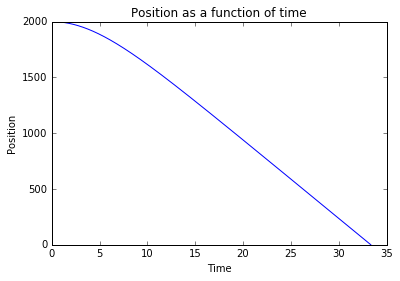

In [5]:
# This is the main script for the position. 

# Modules
%matplotlib inline
import matplotlib.pyplot as pyplot

# Get position at every time
skydiver_position = position(2000, skydiver_time, skydiver_velocity)

# Plot the position as a function of time
pyplot.plot(skydiver_time, skydiver_position)
pyplot.xlabel('Time')
pyplot.ylabel('Position')
pyplot.title('Position as a function of time')

# The last measured position is above ground; interpolate to get time when the professor hits the ground
print('The last measured time is:', skydiver_time[3336])
print('The last measured position is:', skydiver_position[3336])
time_ground = np.interp(0, skydiver_position[::-1], skydiver_time[::-1])
print('The time on the ground is:', time_ground)

The time when the professor reaches terminal velocity is: 33.36000000000193


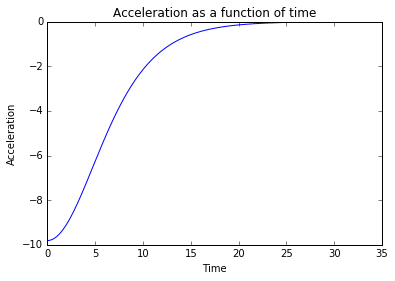

In [6]:
# This is the main script for the acceleration

# Get acceleration at every time
skydiver_acceleration = acceleration(skydiver_time, skydiver_velocity)

# Plot the position as a function of time
pyplot.plot(skydiver_time, skydiver_acceleration)
pyplot.xlabel('Time')
pyplot.ylabel('Acceleration')
pyplot.title('Acceleration as a function of time')

# Interpolate to find when acceleration is zero (i.e., when professor reaches terminal velocity)
# Hmm this doesn't really work because the magnitude of the acceleration is always slightly above zero
# I suppose just look at the graphs to answer the terminal velocity question
time_terminal_velocity = np.interp(0, skydiver_acceleration, skydiver_time)
print('The time when the professor reaches terminal velocity is:', time_terminal_velocity)

## Wrapup

Do you have any lingering questions that remain after this project?

// put your answers here!

## Turn it in!

Turn this assignment in to the Day 18 dropbox in the "in-class activities" folder.